# Newton CG and Quasi Newton Methods

In [1]:
import numpy as np
from numpy.linalg import norm
from scipy.optimize import minimize
from scipy.optimize import root_scalar
import matplotlib.pyplot as plt

In [2]:
from newton_cg_test import test, cg, armijo, f, df, Hessf

# Newton Method

In [18]:
def newton(f, df, Hessf, x0, tol=1e-5, maxit=100000, callback=None):
    x0 = np.zeros(2)
    err = tol+1
    it = 0
    while err > tol and it < maxit:
        g = df(x0)
        d = cg(Hessf(x0), g, x0)
        #alpha = armijo(f, x0, g, d)
        x0 += d#*alpha
        if callback is not None:
            callback(x0)
        err = norm(d)
        it += 1
    return {"solution": x0, "iterations": it, "derivative": g, "estmtd err": d}

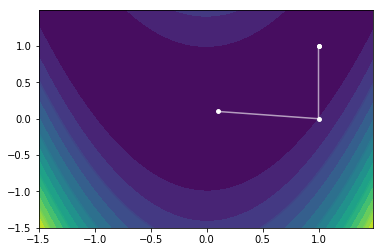

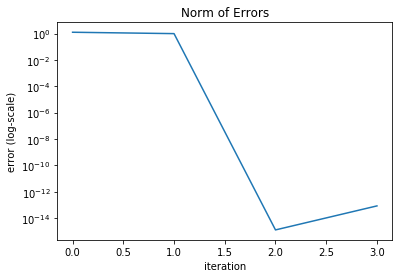

In [19]:
test(newton)

# Broyden Symmetric Rank-1 Update

In [10]:
def broyden1(f, df, Hessf, x0, tol=1e-5, maxit=100000, callback=None, no_updates=False):
    err = tol+1
    it = 0
    n = x0.shape[0]
    B = np.eye(n)   
    restarts = 0
    while err > tol and it < maxit:
        g = df(x0)
        d = np.linalg.solve(B, -g)
        alpha = armijo(f, x0, g, d)
        p = alpha*d
        x0 += p
        if callback is not None:
            callback(x0)
        err = norm(d)
        it += 1
        
        q = df(x0) - g
        numerator = (q - B@p).dot(p)
        if np.abs(numerator) < 1e-9 or no_updates:
            B = np.eye(n)
            restarts += 1
        else:
            B = B + np.outer((q - B@p), (q - B@p)) / numerator
    if it == maxit:
        print("\n" + "#"*20 + "#\t REACHED MAXIMUM NUMBER OF ITERATIONS! \t" + "#"*20)

    return {"solution": x0, "iterations": it, "derivative": g, "estmtd err": d, "restarts": restarts}

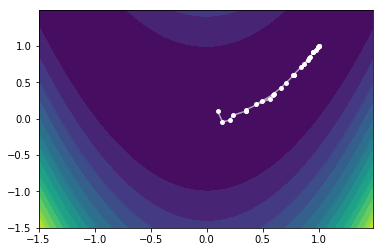

{'solution': array([1.00000078, 1.00000156]), 'iterations': 31, 'derivative': array([ 1.58825695e-06, -1.43904444e-08]), 'estmtd err': array([-1.58825695e-06,  1.43904444e-08]), 'restarts': 5}


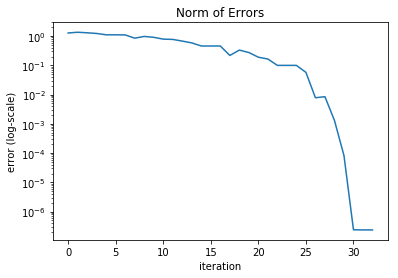

In [11]:
test(broyden1)
sol = broyden1(f, df, Hessf, np.zeros(2))
print(sol)

# BFGS

In [12]:
def bfgs(f, df, Hessf, x0, tol=1e-5, maxit=100000, callback=None):
    err = tol+1
    it = 0
    n = x0.shape[0]
    B = np.eye(n)   
    restarts = 0
    
    while err > tol and it < maxit:
        g = df(x0)
        d = cg(B, g, g)
        alpha = armijo(f, x0, g, d)
        p = alpha*d
        x0 += p
        if callback is not None:
            callback(x0)
        err = norm(d)
        it += 1
        
        q = df(x0) - g
        y = B@p
        numerator = p.dot(q)
        if np.abs(numerator) < 1e-9:
            B = np.eye(n)
            restarts += 1
        else:
            B = B + np.outer(q, q) / numerator - np.outer(y, y) / p.dot(y)
            
    if it == maxit:
        print("\n" + "#"*20 + "#\t REACHED MAXIMUM NUMBER OF ITERATIONS! \t" + "#"*20)

    return {"solution": x0, "iterations": it, "derivative": g, "estmtd err": d, "restarts": restarts}

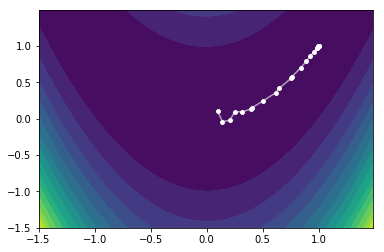

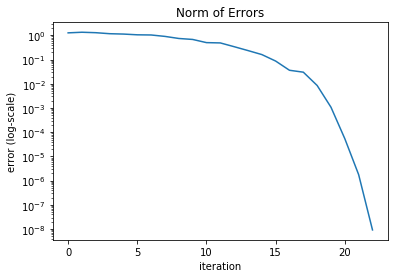

In [13]:
test(bfgs)